In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import numpy as np
import os
import glob

# Preprocess and Merge Dataset

In [5]:
def preprocess_data(pr_folder, ghi_folder, output_file):
    
    # Initialize empty DataFrames for PR and GHI data
    pr_data = pd.DataFrame()
    ghi_data = pd.DataFrame()

    # Process PR data
    pr_files = glob.glob(os.path.join(pr_folder, '*/*.csv'))
    for file in pr_files:
        temp_df = pd.read_csv(file)
        pr_data = pd.concat([pr_data, temp_df], ignore_index=True)

    # Process GHI data
    ghi_files = glob.glob(os.path.join(ghi_folder, '*/*.csv'))
    for file in ghi_files:
        temp_df = pd.read_csv(file)
        ghi_data = pd.concat([ghi_data, temp_df], ignore_index=True)

    # Merge PR and GHI data on 'Date'
    merged_data = pd.merge(pr_data, ghi_data, on='Date', how='inner')

    # Rename columns for clarity
    merged_data.columns = ['Date', 'PR', 'GHI']

    # Save the merged data to a CSV file
    merged_data.to_csv(output_file, index=False)

    return merged_data


In [6]:
# Define the paths
pr_folder = "C:\Machone learning projects\INternshala\job 2\PR"
ghi_folder = "C:\Machone learning projects\INternshala\job 2\GHI"
output_file = 'merged_data.csv'

In [7]:
# Call the function to preprocess the data
merged_data = preprocess_data(pr_folder, ghi_folder, output_file)
print("Merged data saved to:", output_file)

Merged data saved to: merged_data.csv


In [9]:
df=pd.read_csv("merged_data.csv")
df

,Date,PR,GHI
0,2019-07-01,69.575676,3.256608
1,2019-07-02,79.314411,3.976767
2,2019-07-03,61.020006,2.811867
3,2019-07-04,83.262576,3.658408
4,2019-07-05,82.124440,5.590683
...,...,...,...
977,2022-03-20,81.632738,4.226183
978,2022-03-21,71.057353,3.431675
979,2022-03-22,81.631509,3.580492
980,2022-03-23,71.906149,4.997617


# Data Visualization

In [11]:
#1. Rolling average of PR

df['PR_MA30'] = df['PR'].rolling(window=30).mean()

In [13]:
#2. Target Budget

# Define the start and end datesbas per given
df['Date'] = pd.to_datetime(df['Date'])

start_date = pd.to_datetime('2019-07-01')
end_date = pd.to_datetime('2022-03-24')

# Calculate the number of days and the year difference

df['Year'] = (df['Date'] - start_date).dt.days / 365.25

# Calculate the budget line

df['Budget'] = 73.9 * (1 - 0.008) ** df['Year']


In [16]:
#3.  colour coding the GHI values

def colour_code(ghi):
    if ghi < 2:
        return 'navy'
    elif 2 <= ghi < 4:
        return 'lightblue'
    elif 4 <= ghi < 6:
        return 'orange'
    else:
        return 'brown'

df['Color'] = df['GHI'].apply(colour_code)

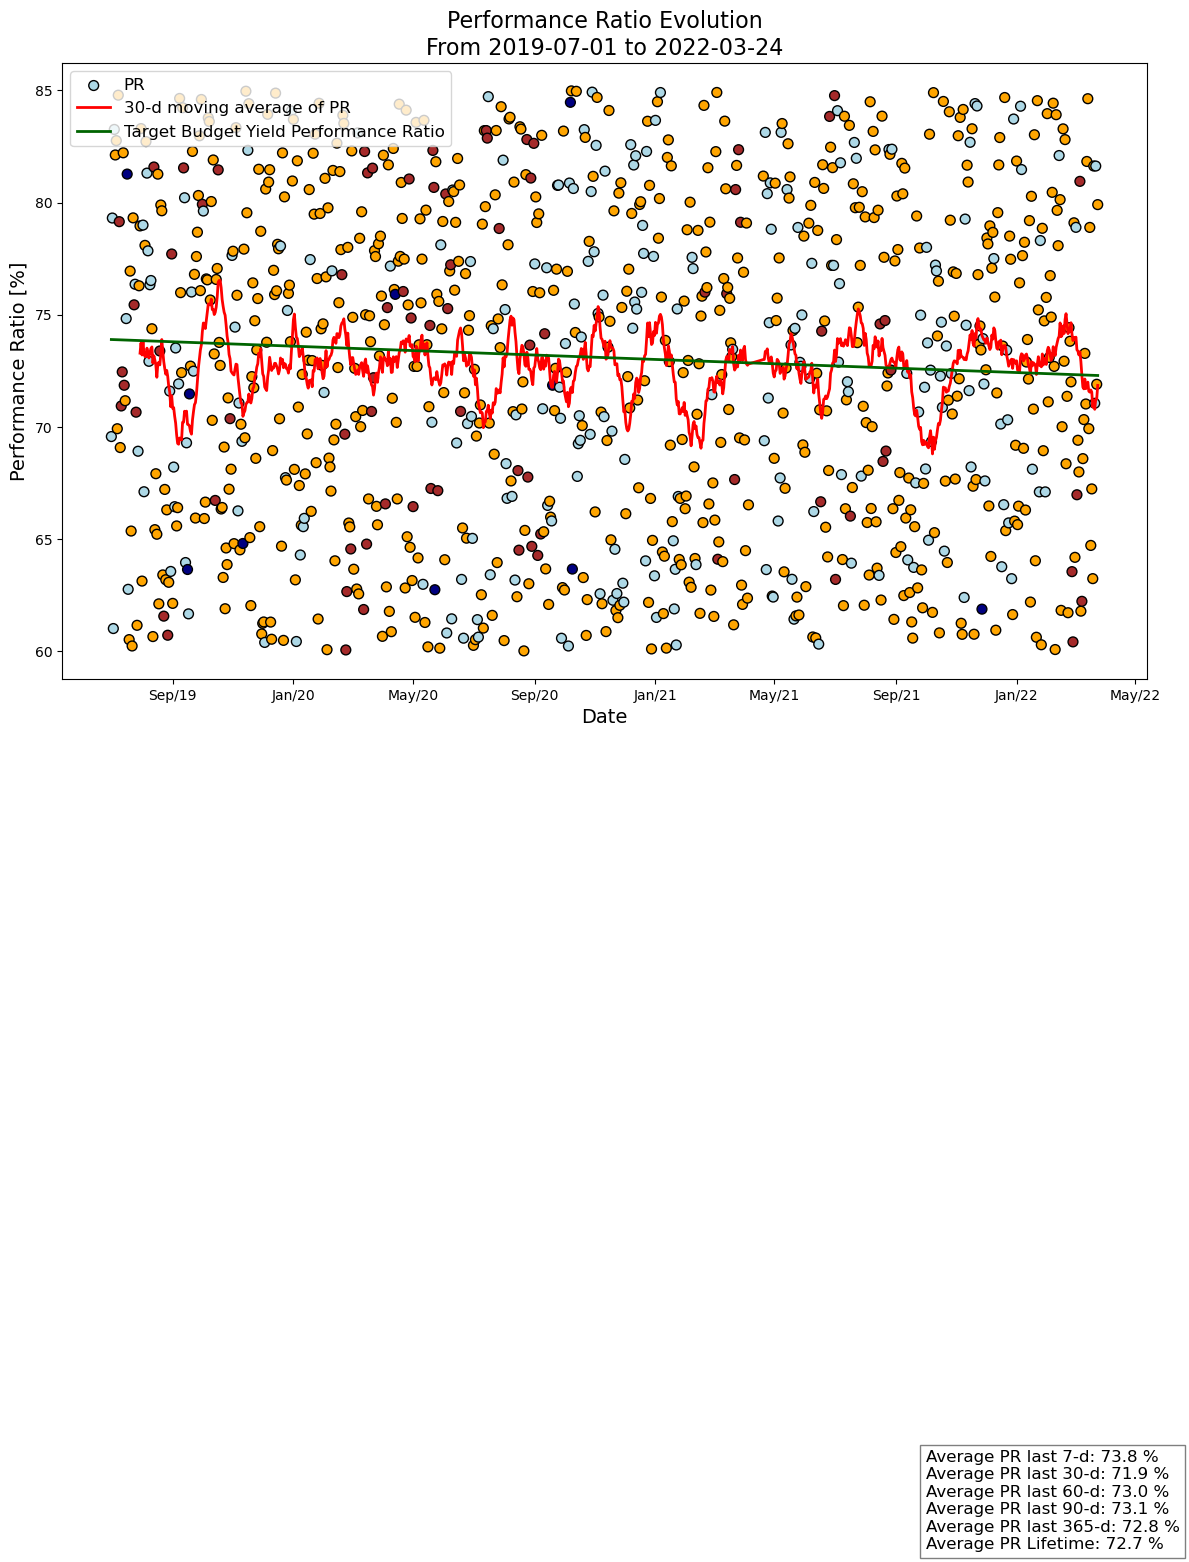

In [18]:
plt.figure(figsize=(14, 8))

# Scatter plot for PR values with GHI color mapping
plt.scatter(df['Date'], df['PR'], c=df['Color'], label='PR', edgecolor='black', s=50)

# Plot the 30-day moving average line for PR
plt.plot(df['Date'], df['PR_MA30'], color='red', label='30-d moving average of PR', linewidth=2)

# Plot the budget line
plt.plot(df['Date'], df['Budget'], color='darkgreen', label='Target Budget Yield Performance Ratio', linewidth=2)

# Format the date axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%b/%y'))

# Add labels and title
plt.title('Performance Ratio Evolution\nFrom 2019-07-01 to 2022-03-24', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Performance Ratio [%]', fontsize=14)

# Add legend
plt.legend(loc='best', fontsize=12)

# Display Average PR for the last periods
average_pr_7d = df['PR'].tail(7).mean()
average_pr_30d = df['PR'].tail(30).mean()
average_pr_60d = df['PR'].tail(60).mean()
average_pr_90d = df['PR'].tail(90).mean()
average_pr_365d = df['PR'].tail(365).mean()
average_pr_lifetime = df['PR'].mean()

# Add text box
plt.text(pd.to_datetime('2021-10-01'), 20, 
         f'Average PR last 7-d: {average_pr_7d:.1f} %\n'
         f'Average PR last 30-d: {average_pr_30d:.1f} %\n'
         f'Average PR last 60-d: {average_pr_60d:.1f} %\n'
         f'Average PR last 90-d: {average_pr_90d:.1f} %\n'
         f'Average PR last 365-d: {average_pr_365d:.1f} %\n'
         f'Average PR Lifetime: {average_pr_lifetime:.1f} %',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()


# Bonus

In [21]:
import argparse
import sys

def visualize_data(start_date=None, end_date=None):
    # Load and preprocess data as above

    # Filter based on date range if provided
    if start_date and end_date:
        mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
        filtered_data = df.loc[mask]
    else:
        filtered_data = df

    # Visualization code as above

if __name__ == "__main__":
    if not (hasattr(sys, 'ps1') or sys.flags.interactive):
        parser = argparse.ArgumentParser(description='Visualize PR data.')
        parser.add_argument('--start_date', type=str, help='Start date in YYYY-MM-DD format')
        parser.add_argument('--end_date', type=str, help='End date in YYYY-MM-DD format')

        args = parser.parse_args()
        
        visualize_data(args.start_date, args.end_date)
    else:
        # Provide default dates or call the function directly
        visualize_data()


In [22]:
plt.savefig('performance_ratio_evolution.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>